In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


X, y = load_iris(return_X_y=True)
features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
target = 'class'
df = pd.DataFrame(data=X, columns=features)
df[target] = y
print(df.head(5))


   sepal-length  sepal-width  petal-length  petal-width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    "Logistic Regression Classifier":LogisticRegression(solver='liblinear', multi_class='ovr'),
    "KNeighbors Classifier":KNeighborsClassifier(n_neighbors=5),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Support Vector Machine Classifier":SVC(),
    "Gaussian Naive Bayesian Classifier":GaussianNB()
}

def train_test_models(models, X_train, X_test, y_train, y_test):
    scores = {}
    cms = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)
        cms[name] = confusion_matrix(y_test, model.predict(X_test))
    return scores, cms

scores, cms = train_test_models(models, X_train, X_test, y_train, y_test)

print("Mean accuracy scores:")
for name, score in scores.items():
    print(f"{name:<34}: {score}")

Mean accuracy scores:
Logistic Regression Classifier    : 0.8
KNeighbors Classifier             : 0.9
Decision Tree Classifier          : 0.9
Random Forest Classifier          : 0.8333333333333334
Support Vector Machine Classifier : 0.8666666666666667
Gaussian Naive Bayesian Classifier: 0.8333333333333334


/home/arren/robogarden_modules/data_intro/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Confusion Matrices:


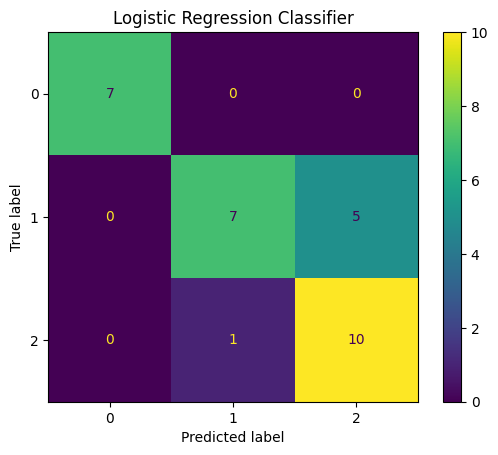

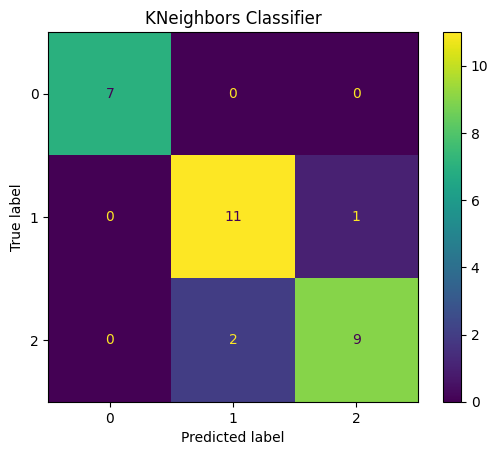

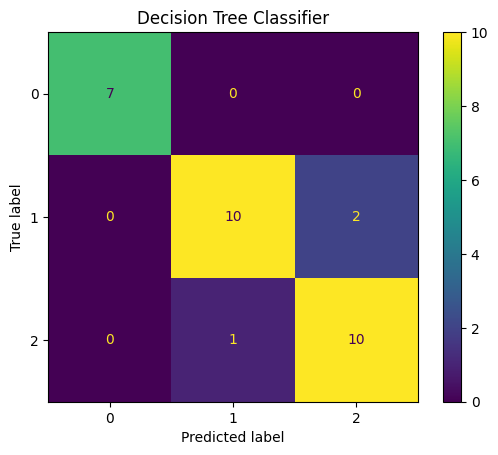

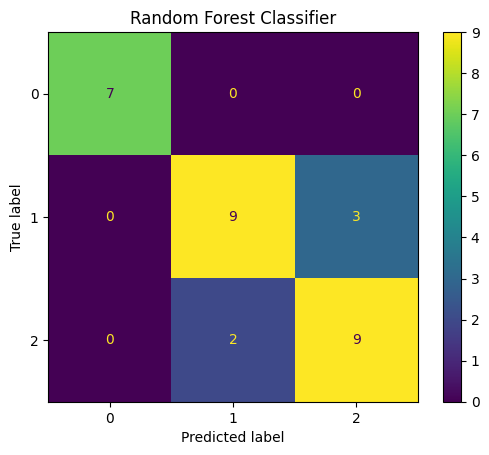

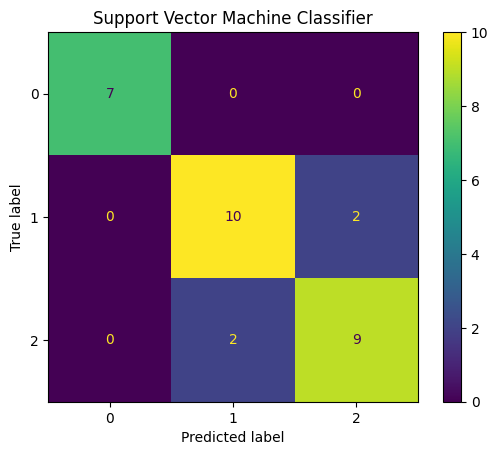

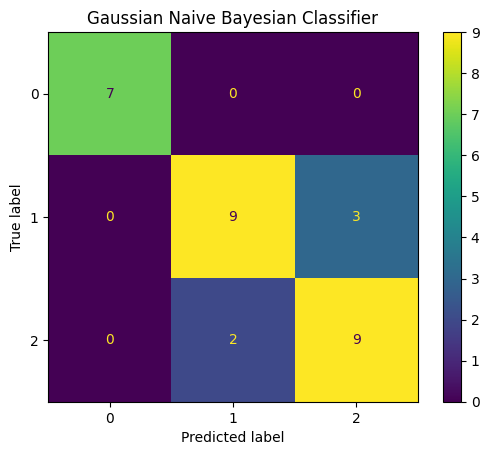

In [42]:
print("Confusion Matrices:")
for name, cm in cms.items():
    fig = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig.plot()
    fig.ax_.set_title(name)

Text(0.5, 0, 'Mean accuracy score')

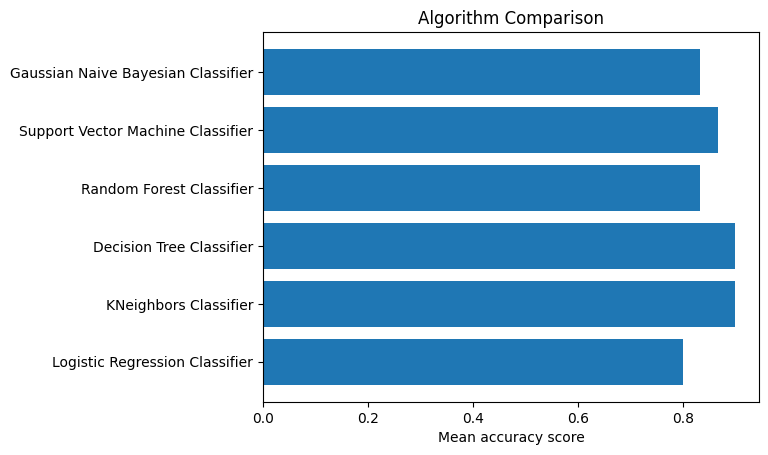

In [53]:
plt.barh(scores.keys(), scores.values())
plt.title("Algorithm Comparison")
plt.xlabel('Mean accuracy score')